Importing Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.float_format', lambda x: '%.3f' % x)

Importing Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
sample_submid = pd.read_csv('sample_submission.csv')

In [3]:
train

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.107,3.594,132.804,3.184,0.082,1.189,3.732,2.266,2.100,...,1.099,0.013,-0.012,0.053,0.065,4.211,1.979,0.086,0.240,0
1,1,0.125,1.673,76.534,3.378,0.099,5.094,1.276,-0.471,4.546,...,3.460,0.017,0.125,0.154,0.607,-0.268,2.578,-0.021,0.025,0
2,2,0.036,1.497,233.546,2.194,0.027,3.127,5.057,3.849,1.802,...,4.883,0.085,0.032,0.116,-0.002,-0.520,2.141,0.124,0.148,0
3,3,-0.014,0.246,779.967,1.891,0.007,1.531,2.698,4.517,4.503,...,3.474,-0.017,-0.008,0.062,0.041,0.512,1.969,0.040,0.045,0
4,4,-0.003,3.715,156.128,2.148,0.018,2.099,4.155,-0.038,3.371,...,1.911,-0.043,0.106,0.125,0.038,1.044,1.075,-0.013,0.073,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.043,1.641,1375.890,1.087,0.840,1.694,3.844,1.108,1.505,...,1.552,0.080,0.018,0.225,0.073,4.437,1.739,0.049,0.066,1
599996,599996,0.137,4.827,-99.648,0.985,0.038,3.304,2.472,5.942,0.875,...,1.345,0.092,0.082,0.234,0.041,3.874,1.870,0.162,0.086,0
599997,599997,1.316,0.502,66.236,2.233,0.060,3.774,2.655,3.156,1.055,...,2.181,0.033,0.110,0.027,0.062,-0.383,0.922,0.085,0.053,0
599998,599998,0.512,3.827,777.872,0.286,0.520,2.763,2.522,1.561,1.971,...,0.367,0.071,0.071,-0.038,0.039,-0.123,3.108,0.061,0.004,1


In [4]:
test

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,600000,0.003,4.839,585.529,2.283,0.713,3.908,0.481,1.482,4.892,...,0.113,1.074,0.122,0.086,0.036,0.011,0.290,1.898,0.132,0.012
1,600001,0.009,0.506,-100.099,3.013,0.027,1.195,5.037,2.517,4.554,...,-0.020,2.622,0.123,0.033,0.123,0.006,-0.393,3.690,0.047,0.120
2,600002,1.461,2.437,-112.964,3.541,0.752,4.338,1.648,4.700,1.950,...,-0.011,2.030,-0.000,0.084,0.124,0.500,4.055,3.331,0.109,0.065
3,600003,0.141,3.086,179.451,0.574,0.057,2.217,1.623,0.526,1.543,...,0.050,0.222,0.045,0.130,0.004,0.018,2.697,-0.533,0.053,0.011
4,600004,0.129,5.200,107.466,-0.497,0.080,0.458,0.630,5.240,-0.232,...,0.059,2.660,0.135,0.036,0.094,0.056,1.111,3.584,0.145,-0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539995,1139995,0.432,1.508,24.270,2.928,2.789,5.152,2.780,0.816,4.792,...,0.083,2.546,0.133,0.040,0.121,0.025,3.183,1.253,0.060,0.029
539996,1139996,0.070,2.355,-128.755,2.722,1.256,4.248,2.015,2.207,3.020,...,0.078,4.020,0.165,0.066,0.081,-0.022,4.512,2.813,0.017,0.079
539997,1139997,0.385,2.529,-63.985,0.975,0.044,0.829,2.014,1.510,2.028,...,0.061,3.605,0.093,0.067,0.114,0.132,0.568,-1.113,0.777,0.124
539998,1139998,1.846,3.415,26.848,-0.120,0.027,2.155,2.530,2.502,3.453,...,-0.013,0.122,0.099,0.044,0.014,0.078,-0.338,0.437,0.055,0.083


In [5]:
print('Number of null values in training set:',train.isnull().sum().sum())
print('Number of null values in test set:',test.isnull().sum().sum())

Number of null values in training set: 0
Number of null values in test set: 0


Exploring & Feature Engineer

various of value = 2
1    303606
0    296394
Name: target, dtype: int64


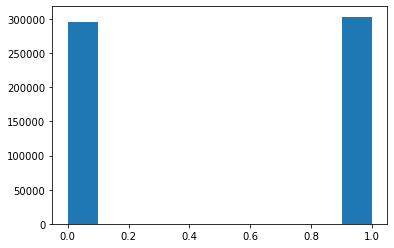

In [7]:
print('various of value =',train['target'].nunique())
print(train['target'].value_counts())
plt.hist(train['target'])
plt.show()

In [8]:
train.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
count,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,...,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000,600000.000
mean,299999.500,0.307,2.498,306.645,2.648,0.178,2.557,2.700,2.572,2.538,...,2.444,0.155,0.059,0.145,0.106,2.548,2.590,0.159,0.123,0.506
std,173205.225,0.522,1.554,551.744,1.545,0.417,1.563,1.564,1.549,1.533,...,1.543,0.548,0.119,0.462,0.209,1.558,1.525,0.436,0.265,0.500
min,0.000,-3.797,-1.224,-1842.530,-1.369,-3.206,-1.170,-1.059,-1.282,-1.242,...,-1.218,-9.762,-4.666,-3.102,-1.277,-1.585,-1.255,-3.994,-2.783,0.000
25%,149999.750,0.026,1.186,43.573,1.442,0.020,1.261,1.386,1.334,1.292,...,1.214,0.019,0.024,0.017,0.025,1.248,1.348,0.014,0.018,0.000
50%,299999.500,0.098,2.517,133.626,2.634,0.062,2.590,2.801,2.558,2.476,...,2.387,0.069,0.057,0.063,0.062,2.602,2.682,0.058,0.058,1.000
75%,449999.250,0.397,3.788,302.262,3.908,0.113,3.814,3.997,3.823,3.804,...,3.694,0.125,0.088,0.113,0.102,3.821,3.840,0.111,0.105,1.000
max,599999.000,8.781,6.227,6119.280,6.521,8.265,6.515,6.587,6.259,6.390,...,6.574,18.413,10.212,8.623,3.657,6.254,6.145,10.767,5.988,1.000


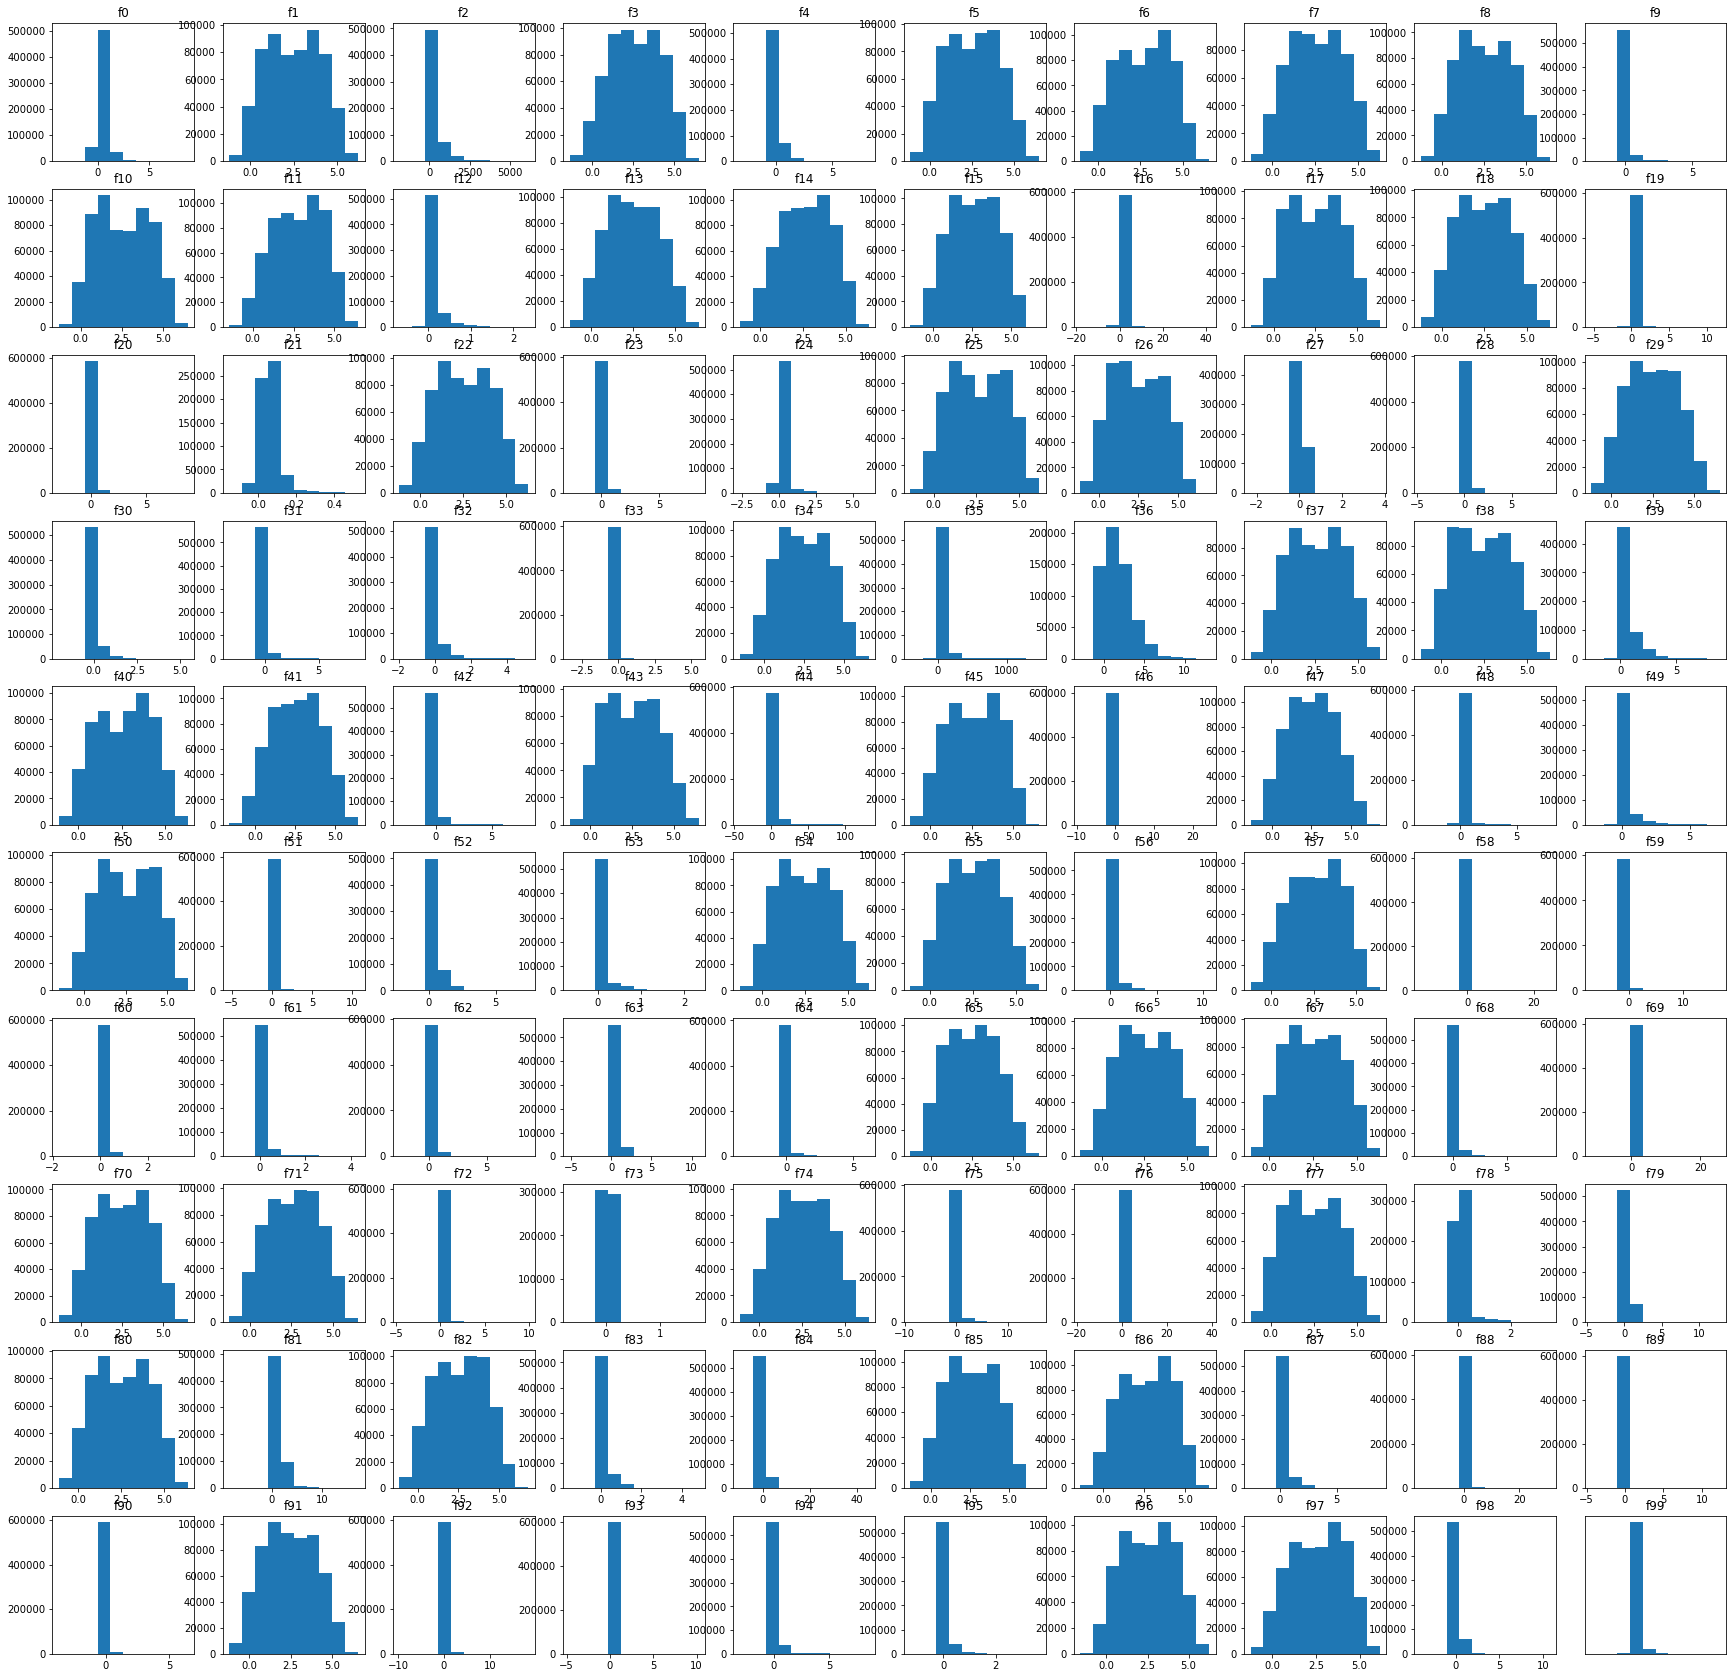

In [9]:
fig, ax = plt.subplots(10, 10, figsize=(30, 30))
for i, column in enumerate(train.columns[1:-1]):
    ax[i // 10, i % 10].hist(train[column])
    ax[i // 10, i % 10].set_title(column)

plt.xticks([])
plt.yticks([])
plt.show()

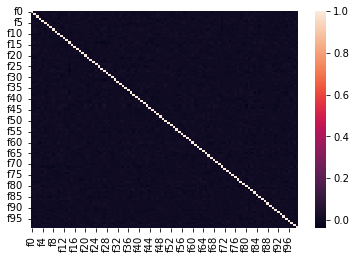

In [10]:
import seaborn as sns

sns.heatmap(train[train.columns[1:-1]].corr())
plt.show()


In [11]:
target = train['target'] # get  target data 
train = train.drop(columns=['id', 'target']) # Id is not feature and Cover_Type is the target
train

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,0.107,3.594,132.804,3.184,0.082,1.189,3.732,2.266,2.100,0.012,...,0.011,1.099,0.013,-0.012,0.053,0.065,4.211,1.979,0.086,0.240
1,0.125,1.673,76.534,3.378,0.099,5.094,1.276,-0.471,4.546,0.038,...,0.136,3.460,0.017,0.125,0.154,0.607,-0.268,2.578,-0.021,0.025
2,0.036,1.497,233.546,2.194,0.027,3.127,5.057,3.849,1.802,0.057,...,0.117,4.883,0.085,0.032,0.116,-0.002,-0.520,2.141,0.124,0.148
3,-0.014,0.246,779.967,1.891,0.007,1.531,2.698,4.517,4.503,0.123,...,-0.015,3.474,-0.017,-0.008,0.062,0.041,0.512,1.969,0.040,0.045
4,-0.003,3.715,156.128,2.148,0.018,2.099,4.155,-0.038,3.371,0.034,...,0.014,1.911,-0.043,0.106,0.125,0.038,1.044,1.075,-0.013,0.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,0.043,1.641,1375.890,1.087,0.840,1.694,3.844,1.108,1.505,-0.022,...,0.047,1.552,0.080,0.018,0.225,0.073,4.437,1.739,0.049,0.066
599996,0.137,4.827,-99.648,0.985,0.038,3.304,2.472,5.942,0.875,-0.010,...,0.109,1.345,0.092,0.082,0.234,0.041,3.874,1.870,0.162,0.086
599997,1.316,0.502,66.236,2.233,0.060,3.774,2.655,3.156,1.055,0.025,...,0.117,2.181,0.033,0.110,0.027,0.062,-0.383,0.922,0.085,0.053
599998,0.512,3.827,777.872,0.286,0.520,2.763,2.522,1.561,1.971,0.462,...,0.072,0.367,0.071,0.071,-0.038,0.039,-0.123,3.108,0.061,0.004


In [12]:
target

0         0
1         0
2         0
3         0
4         1
         ..
599995    1
599996    0
599997    0
599998    1
599999    1
Name: target, Length: 600000, dtype: int64

Analysis

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
import pickle

In [14]:
def save_model(model,path):
    with open(path,'wb') as f:
        pickle.dump(model,f)
    print('The saving has been completed to',path)

def load_model(path):
    with open(path,'rb') as f:
        loaded = pickle.load(f)
    print('The loading has been completed.')
    return loaded

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=42, test_size=0.2)

In [27]:
# Training
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',
    learning_rate =0.001,
    n_estimators=100,
    max_depth=2,
    gamma=0.1,
    colsample_bytree=0.1)
model.fit(X_train.values,y_train,  early_stopping_rounds=5, eval_set=[(X_test.to_numpy(), y_test)])
model_name = model.__class__.__name__
print("train is done")

# Saving
save_model(model,model_name+'_trained.pkl')


C:\Users\Windows 10\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.57719
[1]	validation_0-auc:0.59392
[2]	validation_0-auc:0.59699
[3]	validation_0-auc:0.60096
[4]	validation_0-auc:0.59856
[5]	validation_0-auc:0.61438
[6]	validation_0-auc:0.62747
[7]	validation_0-auc:0.63103
[8]	validation_0-auc:0.64237
[9]	validation_0-auc:0.64255
[10]	validation_0-auc:0.65023
[11]	validation_0-auc:0.65106
[12]	validation_0-auc:0.64724
[13]	validation_0-auc:0.65146
[14]	validation_0-auc:0.65659
[15]	validation_0-auc:0.65927
[16]	validation_0-auc:0.66355
[17]	validation_0-auc:0.67123
[18]	validation_0-auc:0.67503
[19]	validation_0-auc:0.67766
[20]	validation_0-auc:0.68016
[21]	validation_0-auc:0.67555
[22]	validation_0-auc:0.67027
[23]	validation_0-auc:0.67109
[24]	validation_0-auc:0.67431
[25]	validation_0-auc:0.67332
train is done
The saving has been completed to XGBClassifier_trained.pkl


In [35]:
# Make predictions on the testing set
# model = load_model(model.__class__.__name__+'_trained.pkl')
y_pred = model.predict(X_test.values)

y_pred_train = model.predict(X_train.values)

print("predict is done")

predict is done


Validation

In [36]:
print('Training Set')
print(classification_report(y_train,y_pred_train)) 
print('AUC Score',roc_auc_score(y_train,y_pred_train))
print('')
print('Test Set')
print(classification_report(y_test,y_pred)) 
print('AUC Score',roc_auc_score(y_test,y_pred))

Training Set
              precision    recall  f1-score   support

           0       0.67      0.49      0.57    237275
           1       0.61      0.76      0.68    242725

    accuracy                           0.63    480000
   macro avg       0.64      0.63      0.62    480000
weighted avg       0.64      0.63      0.62    480000

AUC Score 0.6289010804441922

Test Set
              precision    recall  f1-score   support

           0       0.67      0.49      0.57     59119
           1       0.61      0.76      0.68     60881

    accuracy                           0.63    120000
   macro avg       0.64      0.63      0.62    120000
weighted avg       0.64      0.63      0.62    120000

AUC Score 0.6279528518092814


Create Submission

In [37]:
test

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,600000,0.003,4.839,585.529,2.283,0.713,3.908,0.481,1.482,4.892,...,0.113,1.074,0.122,0.086,0.036,0.011,0.290,1.898,0.132,0.012
1,600001,0.009,0.506,-100.099,3.013,0.027,1.195,5.037,2.517,4.554,...,-0.020,2.622,0.123,0.033,0.123,0.006,-0.393,3.690,0.047,0.120
2,600002,1.461,2.437,-112.964,3.541,0.752,4.338,1.648,4.700,1.950,...,-0.011,2.030,-0.000,0.084,0.124,0.500,4.055,3.331,0.109,0.065
3,600003,0.141,3.086,179.451,0.574,0.057,2.217,1.623,0.526,1.543,...,0.050,0.222,0.045,0.130,0.004,0.018,2.697,-0.533,0.053,0.011
4,600004,0.129,5.200,107.466,-0.497,0.080,0.458,0.630,5.240,-0.232,...,0.059,2.660,0.135,0.036,0.094,0.056,1.111,3.584,0.145,-0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539995,1139995,0.432,1.508,24.270,2.928,2.789,5.152,2.780,0.816,4.792,...,0.083,2.546,0.133,0.040,0.121,0.025,3.183,1.253,0.060,0.029
539996,1139996,0.070,2.355,-128.755,2.722,1.256,4.248,2.015,2.207,3.020,...,0.078,4.020,0.165,0.066,0.081,-0.022,4.512,2.813,0.017,0.079
539997,1139997,0.385,2.529,-63.985,0.975,0.044,0.829,2.014,1.510,2.028,...,0.061,3.605,0.093,0.067,0.114,0.132,0.568,-1.113,0.777,0.124
539998,1139998,1.846,3.415,26.848,-0.120,0.027,2.155,2.530,2.502,3.453,...,-0.013,0.122,0.099,0.044,0.014,0.078,-0.338,0.437,0.055,0.083


In [38]:
test = test.drop(columns=['id'])

In [39]:
test_result = model.predict(test)

In [40]:
submid = sample_submid.drop(columns=['target'])
submid['target'] = test_result

In [41]:
submid

,id,target
0,600000,1
1,600001,1
2,600002,1
3,600003,1
4,600004,1
...,...,...
539995,1139995,1
539996,1139996,1
539997,1139997,0
539998,1139998,1


In [42]:
submid.to_csv(model_name+'_submid.csv', index=False)
print('export csv as',model_name+'_submid.csv')

export csv as XGBClassifier_submid.csv
